In [11]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
path = 'HGS/'
directories = os.listdir(path)
columns = ['s'+str(i) for i in range(1,19)]
columns = ['instance','cost_solution'] + columns 

In [4]:
dfs = [pd.read_csv(path + i +'/'+ j, sep=';',names = columns) for i in directories for j in os.listdir(path+i)]
df = pd.concat(dfs)
df.head()

,instance,cost_solution,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18
0,XML100_2213_16,12777,137.0910,98.5511,0.2196,0.3788,425.538,112.713,0,340.769,0.3400,0.1727,484.615,0.2643,0.1321,0.0202,343.036,354.490,0.8213,5.1305
1,XML100_2213_16,12591,98.3619,42.7941,0.1051,0.0529,420.071,121.849,0,289.429,0.3198,0.1473,493.286,0.2930,0.1465,0.0364,258.568,368.178,1.3015,4.3288
2,XML100_2213_16,12681,103.3510,49.7809,0.1003,0.0433,418.429,115.255,0,304.429,0.3387,0.1202,531.857,0.3954,0.1977,0.2248,254.380,372.682,1.9949,3.8112
3,XML100_2213_16,12691,155.4840,107.5330,0.1944,0.2361,416.538,124.092,0,331.769,0.3420,0.1308,552.923,0.2619,0.1310,0.0121,280.978,370.279,0.6057,3.9185
4,XML100_2213_16,12690,158.8430,105.3390,0.2202,0.2433,415.769,125.099,0,328.077,0.3352,0.1371,550.000,0.2610,0.1305,0.0082,281.544,368.911,0.4615,3.9908


In [5]:
df.info(memory_usage='deep',show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14109514 entries, 0 to 117291
Data columns (total 20 columns):
 #   Column         Non-Null Count     Dtype  
---  ------         --------------     -----  
 0   instance       14109514 non-null  object 
 1   cost_solution  14109514 non-null  int64  
 2   s1             14109514 non-null  float64
 3   s2             14109514 non-null  float64
 4   s3             14109514 non-null  float64
 5   s4             14109514 non-null  float64
 6   s5             14109514 non-null  float64
 7   s6             14109514 non-null  float64
 8   s7             14109514 non-null  int64  
 9   s8             14109514 non-null  float64
 10  s9             14109514 non-null  float64
 11  s10            14109514 non-null  float64
 12  s11            14109514 non-null  float64
 13  s12            14109514 non-null  float64
 14  s13            14109514 non-null  float64
 15  s14            14109514 non-null  float64
 16  s15            14109514 non-null  fl

In [6]:
df.describe()

,cost_solution,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18
count,1.410951e+07,1.410951e+07,1.410951e+07,1.410951e+07,1.410951e+07,1.410951e+07,1.410951e+07,14109514.0,1.410951e+07,1.410951e+07,1.410951e+07,1.410951e+07,1.410951e+07,1.410951e+07,1.410951e+07,1.410951e+07,1.410951e+07,1.410951e+07,1.410951e+07
mean,1.723776e+04,1.709193e+02,9.152957e+01,1.160378e-01,7.697894e-02,6.882898e+02,2.089691e+02,0.0,5.219688e+02,3.392315e-01,1.145927e-01,9.334037e+02,2.939263e-01,1.469594e-01,1.245224e-01,4.650337e+02,4.127426e+02,1.676633e+00,3.941560e+00
std,5.029218e+03,4.938682e+01,2.857905e+01,6.445211e-02,5.376710e-02,2.140851e+02,9.542985e+01,0.0,1.966723e+02,5.260405e-02,3.374122e-02,3.907646e+02,6.581859e-02,3.291031e-02,1.117571e-01,1.927279e+02,9.508672e+01,9.509874e-01,6.966633e-01
min,7.766000e+03,5.332490e+01,1.350800e+01,1.790000e-02,3.500000e-03,2.968000e+02,4.596100e+01,0.0,1.580000e+02,1.831000e-01,3.130000e-02,1.880000e+02,2.000000e-01,1.000000e-01,0.000000e+00,7.813330e+01,1.172220e+02,0.000000e+00,2.083300e+00
25%,1.272600e+04,1.298820e+02,7.081870e+01,6.760000e-02,4.120000e-02,4.840830e+02,1.217570e+02,0.0,3.237000e+02,3.038000e-01,9.260000e-02,5.275830e+02,2.454000e-01,1.227000e-01,2.070000e-02,2.937230e+02,3.578140e+02,1.065900e+00,3.438900e+00
50%,1.840800e+04,1.735680e+02,8.915280e+01,9.610000e-02,6.210000e-02,7.867500e+02,1.775540e+02,0.0,5.680000e+02,3.396000e-01,1.130000e-01,1.018700e+03,2.692000e-01,1.346000e-01,7.220000e-02,4.164920e+02,4.516800e+02,1.929300e+00,3.853300e+00
75%,2.169600e+04,2.083620e+02,1.086110e+02,1.600000e-01,9.480000e-02,8.745380e+02,3.026610e+02,0.0,6.813000e+02,3.722000e-01,1.399000e-01,1.237100e+03,3.657000e-01,1.828000e-01,2.457000e-01,6.522920e+02,4.834530e+02,2.211100e+00,4.352200e+00
max,2.758800e+04,4.151350e+02,3.789620e+02,4.840000e-01,5.700000e-01,1.099200e+03,4.305820e+02,0.0,9.790830e+02,4.654000e-01,2.534000e-01,1.856000e+03,5.333000e-01,2.667000e-01,3.503000e-01,9.582020e+02,5.466440e+02,3.824700e+00,9.945000e+00


In [7]:
df.drop('s7',1,inplace = True)

/var/folders/_t/q7hcjcqn0g5dkr3kqqrlx4200000gn/T/ipykernel_65406/2608600104.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('s7',1,inplace = True)


In [8]:
df.head()

,instance,cost_solution,s1,s2,s3,s4,s5,s6,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18
0,XML100_2213_16,12777,137.0910,98.5511,0.2196,0.3788,425.538,112.713,340.769,0.3400,0.1727,484.615,0.2643,0.1321,0.0202,343.036,354.490,0.8213,5.1305
1,XML100_2213_16,12591,98.3619,42.7941,0.1051,0.0529,420.071,121.849,289.429,0.3198,0.1473,493.286,0.2930,0.1465,0.0364,258.568,368.178,1.3015,4.3288
2,XML100_2213_16,12681,103.3510,49.7809,0.1003,0.0433,418.429,115.255,304.429,0.3387,0.1202,531.857,0.3954,0.1977,0.2248,254.380,372.682,1.9949,3.8112
3,XML100_2213_16,12691,155.4840,107.5330,0.1944,0.2361,416.538,124.092,331.769,0.3420,0.1308,552.923,0.2619,0.1310,0.0121,280.978,370.279,0.6057,3.9185
4,XML100_2213_16,12690,158.8430,105.3390,0.2202,0.2433,415.769,125.099,328.077,0.3352,0.1371,550.000,0.2610,0.1305,0.0082,281.544,368.911,0.4615,3.9908


In [9]:
df.corr()


/var/folders/_t/q7hcjcqn0g5dkr3kqqrlx4200000gn/T/ipykernel_65406/1886530979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,cost_solution,s1,s2,s3,s4,s5,s6,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18
cost_solution,1.000000,0.058614,-0.021950,-0.631101,-0.536584,0.936667,0.610543,0.912256,0.551346,-0.516273,0.894752,0.213364,0.213385,0.126313,0.577255,0.387145,0.046921,0.171649
s1,0.058614,1.000000,0.459511,0.555572,0.294599,0.052033,0.228633,-0.156648,-0.656871,0.440603,-0.207548,-0.011829,-0.011806,0.068812,0.274946,0.697509,0.001459,-0.478876
s2,-0.021950,0.459511,1.000000,0.170387,0.201709,0.033835,0.192253,-0.017159,-0.166166,0.071407,-0.030908,0.166580,0.166591,0.262080,0.292781,0.234908,0.238002,-0.062799
s3,-0.631101,0.555572,0.170387,1.000000,0.807474,-0.702285,-0.370811,-0.784577,-0.841480,0.772117,-0.809089,-0.203108,-0.203108,-0.173133,-0.346136,0.130923,-0.160165,-0.436334
s4,-0.536584,0.294599,0.201709,0.807474,1.000000,-0.583065,-0.260737,-0.609278,-0.563330,0.558339,-0.622368,-0.084785,-0.084773,-0.061270,-0.258256,-0.013859,-0.103290,-0.228051
s5,0.936667,0.052033,0.033835,-0.702285,-0.583065,1.000000,0.623339,0.955012,0.553694,-0.577184,0.934037,0.155128,0.155155,0.161569,0.599438,0.372480,0.098875,0.261628
s6,0.610543,0.228633,0.192253,-0.370811,-0.260737,0.623339,1.000000,0.497499,0.141744,-0.170544,0.458171,0.508206,0.508243,0.512249,0.988784,0.554169,0.408613,0.080819
s8,0.912256,-0.156648,-0.017159,-0.784577,-0.609278,0.955012,0.497499,1.000000,0.755647,-0.700673,0.993298,0.124755,0.124774,0.101991,0.467513,0.185151,0.056081,0.314690
s9,0.551346,-0.656871,-0.166166,-0.841480,-0.563330,0.553694,0.141744,0.755647,1.000000,-0.801982,0.788552,0.138452,0.138443,0.057258,0.107272,-0.324082,0.057579,0.385039
s10,-0.516273,0.440603,0.071407,0.772117,0.558339,-0.577184,-0.170544,-0.700673,-0.801982,1.000000,-0.759265,-0.261973,-0.261977,-0.257569,-0.162013,0.267777,-0.225253,-0.102166


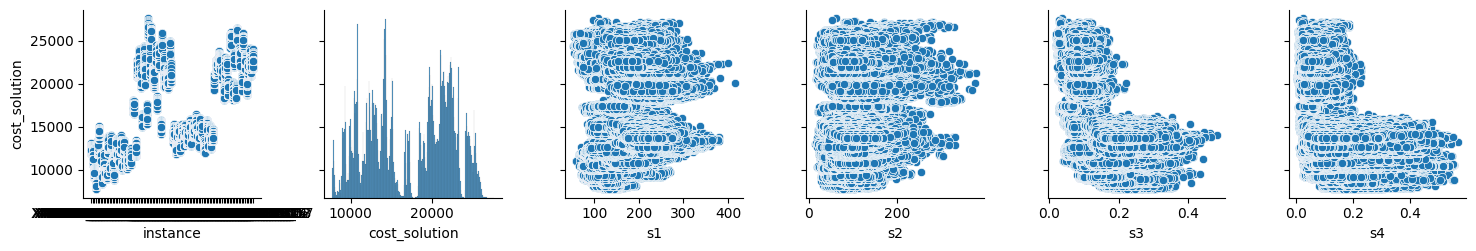

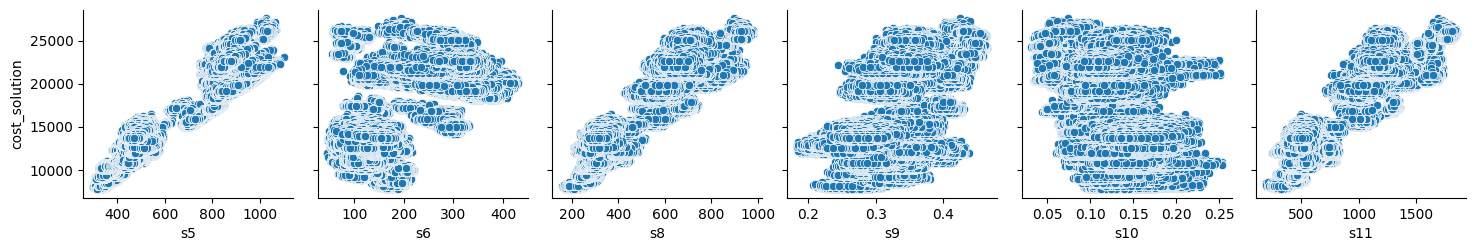

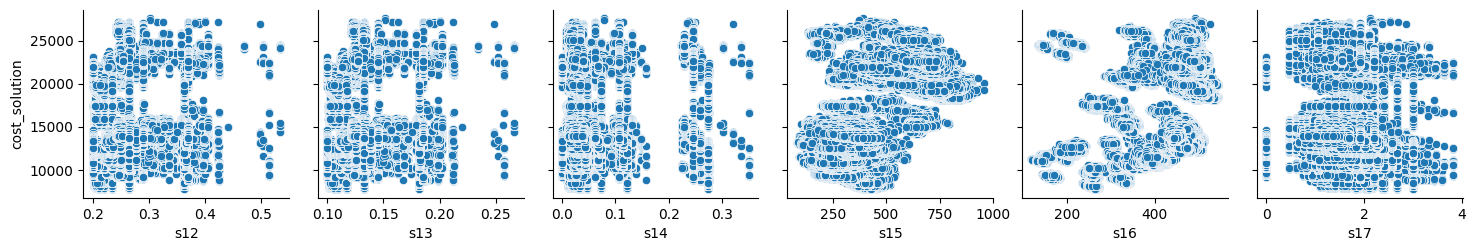

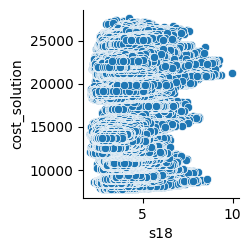

In [10]:
for i in range(0, len(df.columns),6):
    sns.pairplot(data=df,x_vars=df.columns[i:i+6],y_vars=['cost_solution'])

### KNN

In [15]:
X = df.iloc[:,2:].values
Y = df.cost_solution.values.reshape(-1,1)
X_train, X_test, Y_train, Y_test  =  train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [ ]:
K = 4
CLF = KNeighborsClassifier(K)
CLF.fit(X_train,Y_train.ravel() )
Y_pred = CLF.predict(X_test)